In [1]:
from pathlib import Path
import pprint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import numpy as np
from scipy.stats import linregress
import statsmodels.api as sm
import itertools
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
import ipywidgets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cross_decomposition import CCA


In [2]:
col_names=['x1','x2','x3','x4']
df = pd.read_csv('PCA.csv', 
                 sep=",", 
                 skiprows=1,
                 names=col_names)

# Problem 1
- a) Plot the time series for each variable. [1 point for the plot(s)] 
- b) Perform PCA on the data. [1 point for correct size of input data and correct output of PCA] 
- c) Find which modes you want to keep in order to reconstruct the data and provide a rationale for your selection. [1 point for the choice of modes and 1 point for the rationale]. 
- d) Plot the PCs of the significant modes (i.e. those that you kept) in time. Briefly discuss the results (what are these plots telling you?) [1 point for the plot(s) and 1 point for the discussion.] 
- e) Plot PC1 vs PC2.  Discuss any feature that you find interesting.  [1 point for the plot, 1 point for the discussion.] 
 

### Plot the time series for each variable

<Figure size 720x360 with 0 Axes>

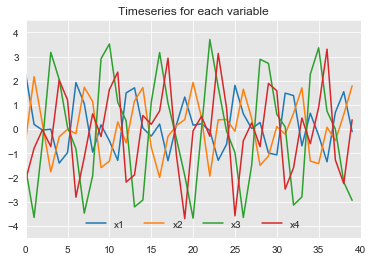

In [3]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = df.plot()
ax.set_title('Timeseries for each variable')
ax.legend(frameon=False, loc='lower center', ncol=len(col_names))
ax.axis([0,40,-4.5,4.5])
plt.savefig('1a')

###  Perform PCA on the data.

In [4]:
#normalize data and check it out
data_norm = (df - df.mean())/df.std()
## We want to run PCA
n_modes = np.min(np.shape(data_norm))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(data_norm)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_
n=2
print(np.sum(fracVar[:n])*100)  #sum of the first n modes = total percent variance explained by the first neigvecs
print(np.shape(eigvecs))
#investigate: did PCA work as we expected?  What size of variables do we expect?
nObservations = np.shape(data_norm)[0]
nVariables = np.shape(data_norm)[1] 
print('Expected sizes:')
print('\t' + str(nVariables) + ' eigenvectors, each of length ' + str(nVariables))
print('\t' + str(nVariables) + ' eigenvalues, one for each eigenvector')
print('\t' + str(nVariables) + ' PCs, each of length ' + str(nObservations))
print('Actual sizes:')
print('\t' + str(np.shape(eigvecs)[0]) + ' eigenvectors, each of length ' + str(np.shape(eigvecs)[1]))
print('\t' + str(len(fracVar)) + ' eigenvalues')
print('\t' + str(np.shape(PCs)[1]) + ' PCs, each of length ' + str(np.shape(PCs)[0]))


97.61264720571651
(4, 4)
Expected sizes:
	4 eigenvectors, each of length 4
	4 eigenvalues, one for each eigenvector
	4 PCs, each of length 40
Actual sizes:
	4 eigenvectors, each of length 4
	4 eigenvalues
	4 PCs, each of length 40


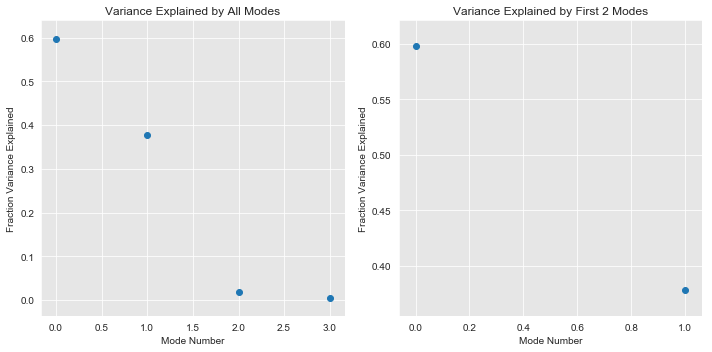

<Figure size 432x288 with 0 Axes>

In [5]:
#plot fraction of variance explained by each mode

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = n
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')
plt.tight_layout()
plt.show()
plt.savefig('1c')

### Find which modes you want to keep in order to reconstruct the data and provide a rationale for your selection. [1 point for the choice of modes and 1 point for the rationale].

<font color='green'>I want to keep the first 2 modes because they explain 97.61264720571651% of all the variance. Eventhough there is a drop off after the first mode, the reason I kept the first two was because just the first one explained only 59.7855606277414% of the variance.</font>

### Plot the PCs of the significant modes (i.e. those that you kept) in time. Briefly discuss the results (what are these plots telling you?) [1 point for the plot(s) and 1 point for the discussion.]


<font color='green'>
Eigenvectors show the spatial patterns and PCs show the temporal patterns. So the first eigenvector plot for mode 1 which accounts for the highest variance, shows the change of variance over the spatial x domain explained by that mode. The first PC plot for MOde 1 shows the temporal variance explained by that mode. Similarly is true for Mode 2, but for the second most significant mode. Overall Eigenvector 1 and 2 are orthogonal, and the PCs are uncorrelated. In this example the PCs show an oscillation through time. 
</font>

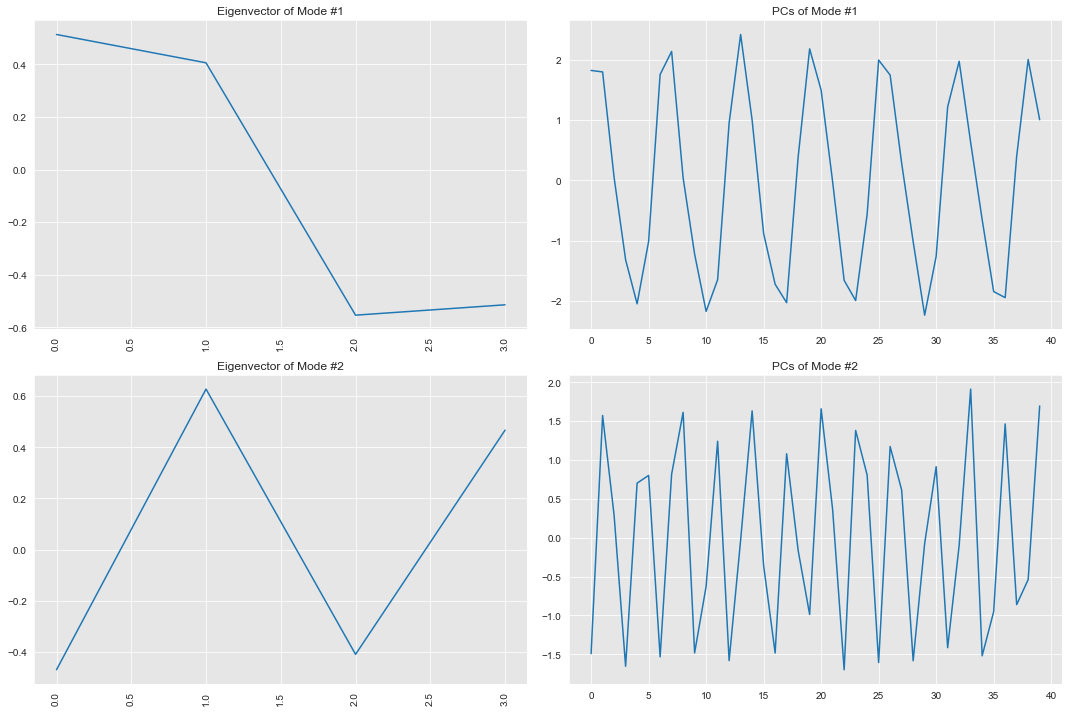

In [6]:
#plot the first n modes and PCs -- choose a value of 'n' from the variance explained figure!

plt.figure(figsize=(15,5*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    plt.plot(eigvecs[kk])
    plt.xticks(rotation=90)
    plt.title('Eigenvector of Mode #' + str(kk+1))
    
    plt.subplot(n,2,(kk+1)*2)
    plt.plot(PCs[:,kk])
    plt.title('PCs of Mode #' + str(kk+1))
    
plt.tight_layout()
plt.savefig('1d.png')

### Plot PC1 vs PC2. Discuss any feature that you find interesting. [1 point for the plot, 1 point for the discussion.]

<font color='green'> There are no defined clusters in this plot, and lowest spread or variance in the centre. There is however a pattern of datapoints aligned towards the left and right corners of the plot, vertically. These edges have most variance too as seen in the plot. The points prove that the PCs are uncorrelated, however they are aligned in a bimodal cluster. Similarly there are pointy ends in almost all the 4 corners if looked closely. </font>

<Figure size 432x288 with 0 Axes>

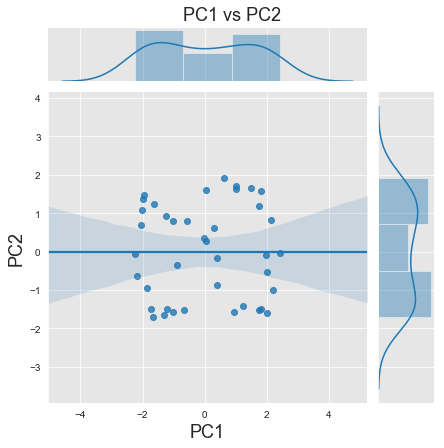

<Figure size 432x288 with 0 Axes>

In [7]:
#plot PC1 vs PC2 
plt.figure()
g = sns.jointplot(PCs[:,0],PCs[:,1], kind='reg')
plt.xlabel('PC1',fontsize=18)
plt.ylabel('PC2',fontsize=18)
plt.subplots_adjust(top=0.93)
g.fig.suptitle('PC1 vs PC2',fontsize=18)
plt.show()
plt.savefig('1e.png')

In [8]:
# plt.figure(figsize=(6,6))
# plt.scatter(PCs[:,0],PCs[:,1],s=5,facecolors=[],edgecolors='k',alpha=0.8)
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.title('PC1 vs PC2')
# plt.show()

#  Problem 2 (total of 11 points): 

Following the guidelines below, perform canonical correlation analysis (CCA) between the two datasets X and Y (CCA.mat or CCA.txt). 

- Dataset X contains time series x1, x2, x3, 
- Dataset Y contains time series y1, y2, y3. 

### Guidelines: 
- a) Plot the original series (you can plot all X data points in 3-D x-space, and all Y data points in 3-D y-space). [1 point for X data plot, 1 point for Y data plot.] 
- b) Perform CCA on the datasets. [ 1 point for correct size of input data and correct output of CCA] 
- c) Plot the vectors that correspond to the modes of high correlation in the 3-D x-space and in the 3-D y-space. For example, if only first two CCA modes have high correlation (e.g. p-value < 0.01) then plot vector F1 and vector F2 in x-space, and G1 and G2 in y-space. [1 point for the plot in x-space, and 1 point for the plot in y-space.] 
- d) Plot U(t) versus V(t) (scatter plot) for each mode. What are these plots telling you? [1 point for the plot(s), and 1 point for the discussion.] 
- e) Plot F (only the significant modes) in 2-D (e.g. x1 vs x2; x1 vs x3; x2 vs x3) to see whether the vectors F (i.e. F1, F2, ...) point in the same direction as PCA eigenvectors of this dataset. Investigate the same for G in y-space. [1 point for the plot(s) in x-space and 1 point for the investigation with PCA; 1 point for the plot(s) in y-space and 1 point for the investigation with PCA]

### load CCA.csv data and create x, y datasets which we will analyze

In [9]:
data = pd.read_csv('CCA.csv',header=0)
n1,n2 = np.shape(data)
xdata = data.iloc[:,:3] #xdata has three variables, 200 observations
ydata = data.iloc[:,3:]  #ydata has three variables, 200 observations
t = range(n1)
data.head()

,x1,x2,x3,y1,y2,y3
0,1.530845,0.316551,-1.823282,1.215005,1.273343,0.026177
1,1.285960,0.823623,-1.389774,1.579516,0.621029,0.804732
2,0.106213,0.578572,0.564672,-0.018080,-1.103449,1.082170
3,-0.937513,0.040444,1.064561,-1.748572,-1.387991,-0.676495
4,-1.516770,-1.462519,1.001928,-0.673814,0.430090,-1.128205


In [10]:
ydata.head()
xdata.head()

,x1,x2,x3
0,1.530845,0.316551,-1.823282
1,1.285960,0.823623,-1.389774
2,0.106213,0.578572,0.564672
3,-0.937513,0.040444,1.064561
4,-1.516770,-1.462519,1.001928


###  Plot the original series (you can plot all X data points in 3-D x-space, and all Y data points in 3-D y-space). [1 point for X data plot, 1 point for Y data plot.] 

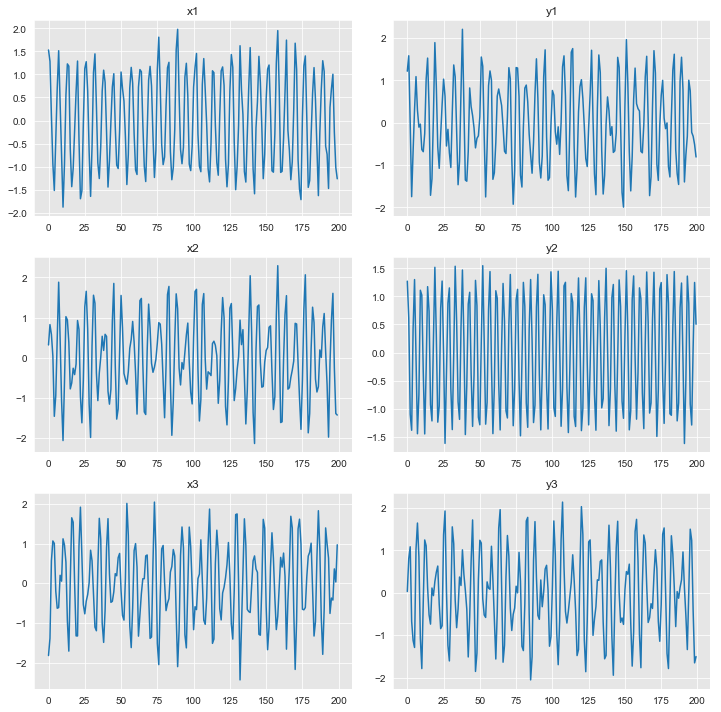

In [11]:
#plot the timeseries for each variable

plt.figure(figsize = (10,10))

plt.subplot(3,2,1)
plt.plot(xdata.iloc[:,0])
plt.title('x1')

plt.subplot(3,2,3)
plt.plot(xdata.iloc[:,1])
plt.title('x2')

plt.subplot(3,2,5)
plt.plot(xdata.iloc[:,2])
plt.title('x3')

plt.subplot(3,2,2)
plt.plot(ydata.iloc[:,0])
plt.title('y1')

plt.subplot(3,2,4)
plt.plot(ydata.iloc[:,1])
plt.title('y2')

plt.subplot(3,2,6)
plt.plot(ydata.iloc[:,2])
plt.title('y3')

plt.tight_layout()
plt.show()

# plt.savefig('2a.png')

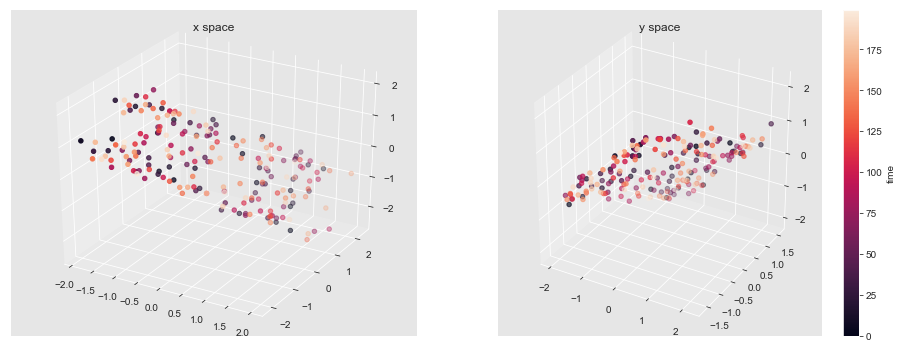

In [12]:
fig = plt.figure(figsize=(16,6))

ax = fig.add_subplot(121,projection='3d')
ax.scatter(xdata.iloc[:,0],xdata.iloc[:,1],xdata.iloc[:,2],c=t)
plt.title('x space')

ax = fig.add_subplot(122,projection='3d')
p = ax.scatter(ydata.iloc[:,0],ydata.iloc[:,1],ydata.iloc[:,2],c=t)
plt.title('y space')
cbar = fig.colorbar(p)
cbar.set_label('time')
plt.savefig('2a.png')

### Perform CCA on the datasets. [ 1 point for correct size of input data and correct output of CCA]

In [13]:
n_modes = 3 #modes to keep
cca = CCA(n_components=n_modes,max_iter = 10000)
U,V = cca.fit_transform(xdata,ydata)
A = cca.x_weights_
B = cca.y_weights_
F = np.cov(xdata.T)@A
G = np.cov(ydata.T)@B
r = [np.corrcoef(U[:,ii],V[:,ii]) for ii in range(n_modes)]

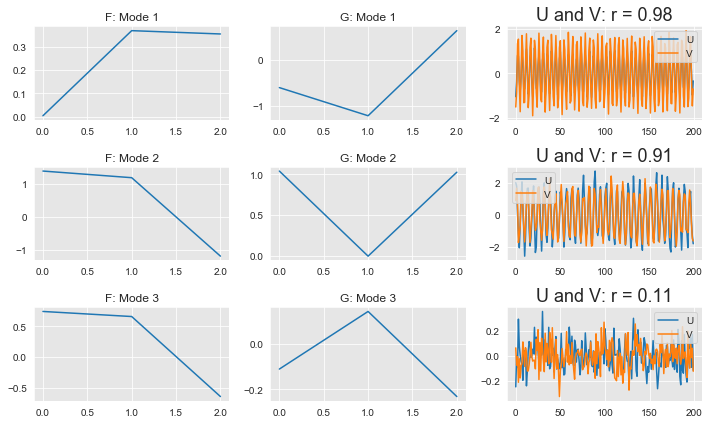

F: 
[[ 0.00446775  1.38448709  0.74085775]
 [ 0.36774811  1.18278841  0.65839886]
 [ 0.35360286 -1.20036722 -0.64154713]]
G: 
[[-0.60781613  1.04238248 -0.11125062]
 [-1.21694479 -0.0053953   0.14002947]
 [ 0.62447444  1.02810331 -0.23102376]]


In [14]:
#visualize results

plt.figure(figsize=(10,6))

for kk in range(n_modes):
    
    plt.subplot(n_modes,3,kk*3+1)
    plt.plot(F[:,kk])
    plt.title('F: Mode ' + str(kk+1))
    
    plt.subplot(n_modes,3,kk*3+2)
    plt.plot(G[:,kk])
    plt.title('G: Mode ' + str(kk+1))
    
    plt.subplot(n_modes,3,kk*3+3)
    plt.plot(U[:,kk])
    plt.plot(V[:,kk])
    plt.title('U and V: r = ' + str(r[kk][0][1])[:4], fontsize = 18)
    plt.legend(['U','V'])
    
plt.tight_layout()
plt.show()

print('F: ')
print(F)

print('G: ')
print(G)

FM1=F[:,0]  #Mode 1
FM2=F[:,1]  #Mode 2
FM3=F[:,2]  #Mode 3

GM1=G[:,0]  #Mode 1
GM2=G[:,1]  #Mode 2
GM3=G[:,2]  #Mode 3

### c) Plot the vectors that correspond to the modes of high correlation in the 3-D x-space and in the 3-D y-space. For example, if only first two CCA modes have high correlation (e.g. p-value less than 0.01) then plot vector F1 and vector F2 in x-space, and G1 and G2 in y-space. [1 point for the plot in x-space, and 1 point for the plot in y-space.]

<font color = 'green'> F1 is black, F2 is blue. G1 is black, G2 is blue.  </font>

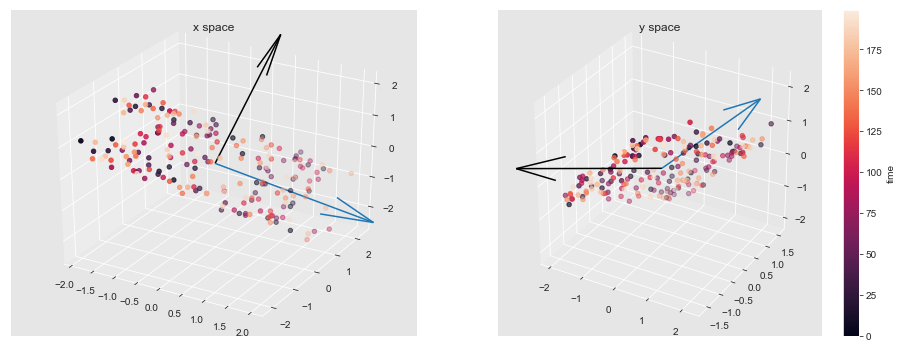

In [15]:
fig = plt.figure(figsize=(16,6))

ax = fig.add_subplot(121,projection='3d')
ax.scatter(xdata.iloc[:,0],xdata.iloc[:,1],xdata.iloc[:,2],c=t)
ax.quiver(0,0,0,FM1[0],FM1[1],FM1[2],length=4,normalize=True,color='black')    #vector F1
ax.quiver(0,0,0,FM2[0],FM2[1],FM2[2],length=4,normalize=True)    #vector F2

plt.title('x space')

ax = fig.add_subplot(122,projection='3d')
p = ax.scatter(ydata.iloc[:,0],ydata.iloc[:,1],ydata.iloc[:,2],c=t)
ax.quiver(0,0,0,GM1[0],GM1[1],GM1[2],length=4,normalize=True,color='black')    #vector G1
ax.quiver(0,0,0,GM2[0],GM2[1],GM2[2],length=4,normalize=True)    #vector G2
plt.title('y space')
cbar = fig.colorbar(p)
cbar.set_label('time')
plt.savefig('2c')

### d) Plot U(t) versus V(t) (scatter plot) for each mode. What are these plots telling you? [1 point for the plot(s), and 1 point for the discussion.] 

<font color='green'> Mode 1 has the highest r value of 0.98 and hence the highest correlation. This is seen in the plot below (grey diamonds), where the data points for Mode 1 show the smallest deviation and follow a narrow positively increasing trend. The second significant mode is Mode 2 (r=0.91). It has some more spread than Mode 1 (the + markers) but still shows a positive correlation between the U and V markers. Mode 3 is just a cluster in one spot, and shows lowest correlation as predicted by the r value of 0.11. It does not follow any linear trends.</font>

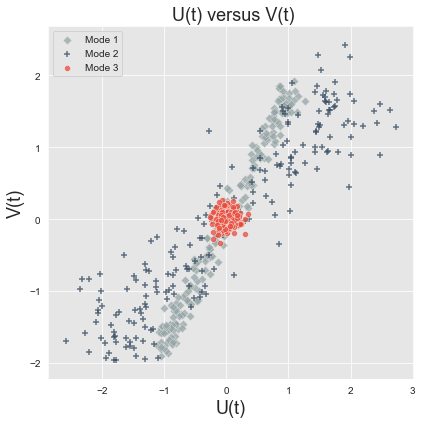

In [16]:
plt.figure(figsize=(6,6))
flatui = ["#95a5a6", "#34495e", "#e74c3c"]
sns.set_palette(flatui)

sns.scatterplot(x=U[:,0],y=V[:,0],marker='D',edgecolor="0.9",linewidth=.5, alpha=.75)
sns.scatterplot(x=U[:,1],y=V[:,1], marker='+',linewidth=1.5, alpha=.75)
sns.scatterplot(x=U[:,2],y=V[:,2], marker='o',edgecolor="1", linewidth=.5, alpha=.75)    
    
labels=['Mode 1','Mode 2','Mode 3']
plt.title(' U(t) versus V(t)',fontsize = 18)
plt.xlabel('U(t)',fontsize = 18)
plt.ylabel('V(t)',fontsize = 18)
plt.legend(labels)    
plt.tight_layout()
plt.show()  

 ### Plot F (only the significant modes) in 2-D (e.g. x1 vs x2; x1 vs x3; x2 vs x3) to see whether the vectors F (i.e. F1, F2, ...) point in the same direction as PCA eigenvectors of this dataset. Investigate the same for G in y-space. [1 point for the plot(s) in x-space and 1 point for the investigation with PCA; 1 point for the plot(s) in y-space and 1 point for the investigation with PCA]

In [17]:
#do PCA on T and x datasets so that CCA is finding modes which explain non-negligible fractions of total variance
pca_input_x = xdata
n_modes_x = np.min(np.shape(xdata))
pca_x = PCA(n_components = n_modes_x)
PCs_x = pca_x.fit_transform(pca_input_x)
eigvecs_x = pca_x.components_
fracVar_x = pca_x.explained_variance_ratio_

pca_input_y = ydata
n_modes_y = np.min(np.shape(ydata))
pca_y = PCA(n_components = n_modes_y)
PCs_y = pca_y.fit_transform(pca_input_y)
eigvecs_y = pca_y.components_
fracVar_y = pca_y.explained_variance_ratio_


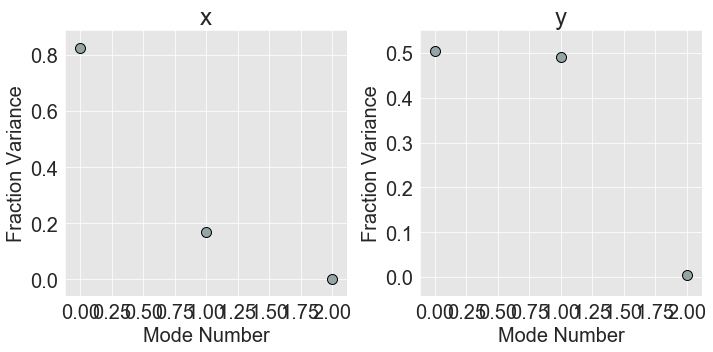

In [18]:
#plot fraction of variance explained by modes of x and y to choose how many modes to use in reconstruction

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
n_modes_show = 3
plt.scatter(range(n_modes_show),fracVar_x[:n_modes_show], s=100, edgecolor = 'k')
plt.xlabel('Mode Number', fontsize = 20)
plt.ylabel('Fraction Variance', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('x', fontsize = 24)

plt.subplot(1,2,2)
plt.scatter(range(n_modes_show),fracVar_y[:n_modes_show], s=100, edgecolor = 'k')
plt.xlabel('Mode Number', fontsize = 20)
plt.ylabel('Fraction Variance', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('y', fontsize = 24)

plt.tight_layout()
plt.show()

Eig_x: 
[[ 0.63316161  0.54639535 -0.54823216]
 [-0.00401208  0.71059961  0.70358518]
 [-0.77400923  0.44328357 -0.45211657]]
Eig_y: 
[[-0.00299915 -0.70850853  0.70569588]
 [ 0.82241792  0.39970939  0.4047977 ]
 [ 0.56887589 -0.58159098 -0.58149132]]


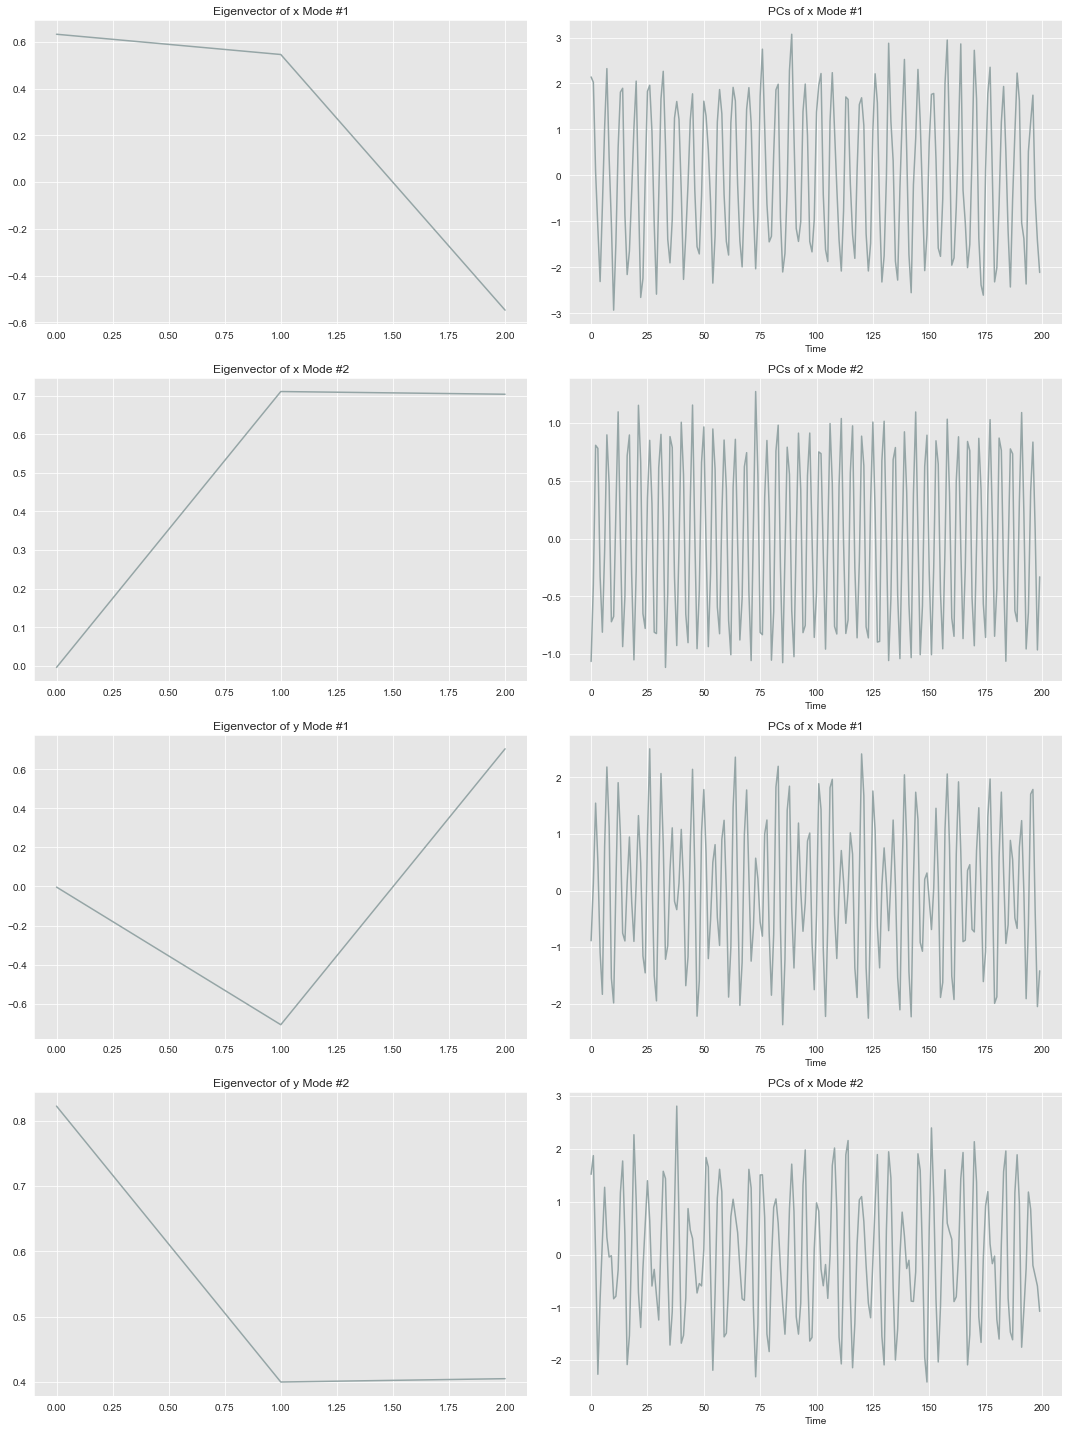

In [19]:
n = 2

plt.figure(figsize=(15,10*n))
for kk in range(n):
    
    plt.subplot(2*n,2,kk*2+1)
    plt.plot(eigvecs_x[kk,:])
    plt.title('Eigenvector of x Mode #' + str(kk+1))

    
    plt.subplot(2*n,2,(kk+1)*2)
    plt.plot(PCs_x[:,kk])
    plt.title('PCs of x Mode #' + str(kk+1))
    plt.xlabel('Time')
    
    plt.subplot(2*n,2,kk*2+5)
    plt.plot(eigvecs_y[kk,:])
    plt.title('Eigenvector of y Mode #' + str(kk+1))
    
    plt.subplot(2*n,2,kk*2+6)
    plt.plot(PCs_y[:,kk])
    plt.title('PCs of x Mode #' + str(kk+1))
    plt.xlabel('Time')
    
    plt.tight_layout()
    
print('Eig_x: ')
print(eigvecs_x)
print('Eig_y: ')
print(eigvecs_y)


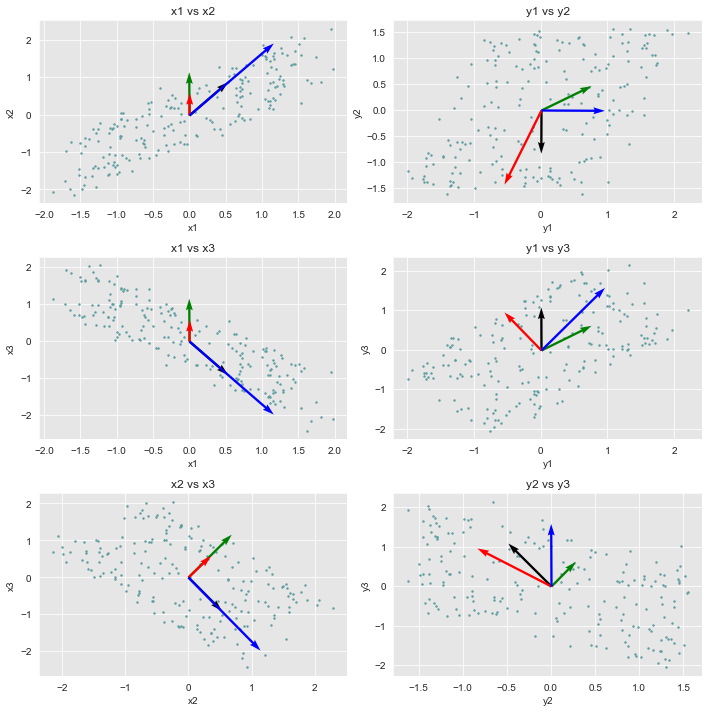

In [20]:
EXM1=eigvecs_x[0]
EXM2=eigvecs_x[1]
EXM3=eigvecs_x[2]

EYM1=eigvecs_y[0]
EYM2=eigvecs_y[1]
EYM3=eigvecs_y[2]

n_modes=2
plt.figure(figsize=(10,10))


ax = plt.subplot(3,2,1)   
ax.scatter(data['x1'],data['x2'],s=2,color='cadetblue')
ax.quiver(0,0,EXM1[0],EXM1[1],scale=3,scale_units='height',color='black')    #eigen mode1
ax.quiver(0,0,EXM2[0],EXM2[1],scale=3,scale_units='height',color='green')    #eigen mode2
ax.quiver(0,0,FM1[0],FM1[1],scale=3,scale_units='height',color='red')        #vector F1
ax.quiver(0,0,FM2[0],FM2[1],scale=3,scale_units='height',color='blue')       #vector F2
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('x1 vs x2')

ax = plt.subplot(3,2,3)   
ax.scatter(data['x1'],data['x3'],s=2,color='cadetblue')
ax.quiver(0,0,EXM1[0],EXM1[2],scale=3,scale_units='height',color='black')
ax.quiver(0,0,EXM2[0],EXM2[2],scale=3,scale_units='height',color='green')
ax.quiver(0,0,FM1[0],FM1[2],scale=3,scale_units='height',color='red')   
ax.quiver(0,0,FM2[0],FM2[2],scale=3,scale_units='height',color='blue')   
ax.set_xlabel('x1')
ax.set_ylabel('x3')
ax.set_title('x1 vs x3')

ax = plt.subplot(3,2,5)   
ax.scatter(data['x2'],data['x3'],s=2,color='cadetblue')
ax.quiver(0,0,EXM1[1],EXM1[2],scale=3,scale_units='height',color='black') 
ax.quiver(0,0,EXM2[1],EXM2[2],scale=3,scale_units='height',color='green') 
ax.quiver(0,0,FM1[1],FM1[2],scale=3,scale_units='height',color='red')    
ax.quiver(0,0,FM2[1],FM2[2],scale=3,scale_units='height',color='blue')   
ax.set_xlabel('x2')
ax.set_ylabel('x3')
ax.set_title('x2 vs x3')

ax = plt.subplot(3,2,2)   
ax.scatter(data['y1'],data['y2'],s=2,color='cadetblue')
ax.quiver(0,0,EYM1[0],EYM1[1],scale=3,scale_units='height',color='black')    #eigen mode1
ax.quiver(0,0,EYM2[0],EYM2[1],scale=3,scale_units='height',color='g')    #eigen mode2
ax.quiver(0,0,GM1[0],GM1[1],scale=3,scale_units='height',color='red')    #vector G1
ax.quiver(0,0,GM2[0],GM2[1],scale=3,scale_units='height',color='b')    #vector G2
ax.set_xlabel('y1')
ax.set_ylabel('y2')
ax.set_title('y1 vs y2')

ax = plt.subplot(3,2,4)   
ax.scatter(data['y1'],data['y3'],s=2,color='cadetblue')
ax.quiver(0,0,EYM1[0],EYM1[2],scale=3,scale_units='height',color='black')    #eigen mode1
ax.quiver(0,0,EYM2[0],EYM2[2],scale=3,scale_units='height',color='g')    #eigen mode2
ax.quiver(0,0,GM1[0],GM1[2],scale=3,scale_units='height',color='red')    #vector G1
ax.quiver(0,0,GM2[0],GM2[2],scale=3,scale_units='height',color='b')    #vector G2
ax.set_xlabel('y1')
ax.set_ylabel('y3')
ax.set_title('y1 vs y3')

ax = plt.subplot(3,2,6)   
ax.scatter(data['y2'],data['y3'],s=2,color='cadetblue')
ax.quiver(0,0,EYM1[1],EYM1[2],scale=3,scale_units='height',color='black')    #eigen mode1
ax.quiver(0,0,EYM2[1],EYM2[2],scale=3,scale_units='height',color='g')    #eigen mode2
ax.quiver(0,0,GM1[1],GM1[2],scale=3,scale_units='height',color='red')    #vector G1
ax.quiver(0,0,GM2[1],GM2[2],scale=3,scale_units='height',color='b')    #vector G2
ax.set_xlabel('y2')
ax.set_ylabel('y3')
ax.set_title('y2 vs y3')
    
plt.tight_layout()
plt.show()